In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [3]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp36-none-any.whl size=11686 sha256=b05e4734d392ffac84fb2f71f2de4bce932ef8453dd8ed9c5dbc62f5a4466963
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [10]:
import wikipedia as wp

In [35]:
content_dict = {}
def extract_content_pages(lang, page):
  
  wp.set_lang(lang)

  page_content = wp.page(page).content
  content_dict[lang] = page_content

  return content_dict


In [36]:
lang = ['en', 'it', 'ar', 'hi']
pagename = 'Book'
#c = extract_content_pages(lang, pagename)

for word in lang:  
  x = extract_content_pages(word, pagename)



In [38]:
x

{'ar': 'كِتابُ وجمعه كُتبُ هي أوعية المعلومات غير الدورية والتي بطبيعة محتوياتها وتنظيمها وضعت لتُقرأ من أولها لآخرها في تتابع منطقي ولكل منها عنوان محدد حتى ولو صدرت مجمعة تحت سلسلة ما.\n\n\n== لغة واصطلاحا ==\nالكتاب لغة صحف جمعت بين دفتين  وربما أشير بالكتاب إلى الرسالة كأن يقال أرسل فلان إلى فلان كتابا أي رسالة أما في الاصطلاح فالكتاب عند الأصوليين المسلمين يقصد به القرآن الكريم، والكتاب هو القدر، وفي اللهجة المصرية يقال كتب الكتاب ومعناه عقد القران \nأما في عصرنا الحالي فتعدى المعنى اللغوي للكتاب كل ما هو محصور بين دفتين ليشير أيضا إلى نسخ الكتب المصورة أو تلك المعالجة في البرامج المكتبية.\n\n\n== أنواع الكتب ==\nوالكتب أنواع فمنها الكتب المرجعية وهي المصادر التي تضم مجموعة من  المعلومات المعينة بشكل منظم وميسر توفر الحصول عليها في وقت وجيز أو المصادر المخصصة للتوسع في موضوع ما ومعالجته من مختلف الجوانب، والكتب المرجعية عموما هي التي يمكن الرجوع إليه للحصول على المعلومة وهي أنواع:\nالموسوعة:\nوهي مصدر يضم ملخصات حول مواضيع معينة وتكون إما عامة تلخص معلومات في مواضيع عديدة كموسوعة:

In [49]:
from nltk.tokenize import RegexpTokenizer

# tokenized text - remove punctuation
tokenizer = RegexpTokenizer(r'\w+')
texts_split = {key: tokenizer.tokenize(text) for key, text in x.items()}


In [57]:
texts_split['en']

['A',
 'book',
 'is',
 'a',
 'medium',
 'for',
 'recording',
 'information',
 'in',
 'the',
 'form',
 'of',
 'writing',
 'or',
 'images',
 'typically',
 'composed',
 'of',
 'many',
 'pages',
 'made',
 'of',
 'papyrus',
 'parchment',
 'vellum',
 'or',
 'paper',
 'bound',
 'together',
 'and',
 'protected',
 'by',
 'a',
 'cover',
 'The',
 'technical',
 'term',
 'for',
 'this',
 'physical',
 'arrangement',
 'is',
 'codex',
 'plural',
 'codices',
 'In',
 'the',
 'history',
 'of',
 'hand',
 'held',
 'physical',
 'supports',
 'for',
 'extended',
 'written',
 'compositions',
 'or',
 'records',
 'the',
 'codex',
 'replaces',
 'its',
 'predecessor',
 'the',
 'scroll',
 'A',
 'single',
 'sheet',
 'in',
 'a',
 'codex',
 'is',
 'a',
 'leaf',
 'and',
 'each',
 'side',
 'of',
 'a',
 'leaf',
 'is',
 'a',
 'page',
 'As',
 'an',
 'intellectual',
 'object',
 'a',
 'book',
 'is',
 'prototypically',
 'a',
 'composition',
 'of',
 'such',
 'great',
 'length',
 'that',
 'it',
 'takes',
 'a',
 'considerable',


In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [62]:
from nltk.corpus import stopwords

shortlang = ['en', 'it', 'ar']

# long format of languages for stopword identification
languages_long = {'en': 'english', 'it': 'italian', 'ar': 'arabic'}
#, 'hi': 'hindi'}

# create dict of stopwords by language
stopwords_bylang = {lan: set(stopwords.words(languages_long[lan])) for lan in shortlang}

# filter stopwords from text
text_bylang_stop = {lan: [f for f in texts_split[lan] if not f in stopwords_bylang[lan]] for lan in shortlang}

In [68]:
stopwords_bylang['en']

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [67]:
text_bylang_stop['en']

['A',
 'book',
 'medium',
 'recording',
 'information',
 'form',
 'writing',
 'images',
 'typically',
 'composed',
 'many',
 'pages',
 'made',
 'papyrus',
 'parchment',
 'vellum',
 'paper',
 'bound',
 'together',
 'protected',
 'cover',
 'The',
 'technical',
 'term',
 'physical',
 'arrangement',
 'codex',
 'plural',
 'codices',
 'In',
 'history',
 'hand',
 'held',
 'physical',
 'supports',
 'extended',
 'written',
 'compositions',
 'records',
 'codex',
 'replaces',
 'predecessor',
 'scroll',
 'A',
 'single',
 'sheet',
 'codex',
 'leaf',
 'side',
 'leaf',
 'page',
 'As',
 'intellectual',
 'object',
 'book',
 'prototypically',
 'composition',
 'great',
 'length',
 'takes',
 'considerable',
 'investment',
 'time',
 'compose',
 'still',
 'considerable',
 'though',
 'extensive',
 'investment',
 'time',
 'read',
 'In',
 'restricted',
 'sense',
 'book',
 'self',
 'sufficient',
 'section',
 'part',
 'longer',
 'composition',
 'usage',
 'reflects',
 'fact',
 'antiquity',
 'long',
 'works',
 'wr

In [74]:
from nltk.stem import SnowballStemmer

# define stemmer objects by language
stemmers = {lan: SnowballStemmer(languages_long[lan]) for lan in shortlang}

shorterlang = ['en', 'it']

# stem text
text_bylang_stemmed = {lan: [stemmers[lan].stem(word) for word in texts_split[lan]] for lan in shorterlang}

# stem and remove stopwords
text_bylang_stop_stemmed = {lan: [stemmers[lan].stem(word) for word in text_bylang_stop[lan]] for lan in shorterlang}


In [71]:
stemmers = {lan: SnowballStemmer(languages_long[lan]) for lan in shortlang}
stemmers['en'].stem

{'ar': <nltk.stem.snowball.SnowballStemmer at 0x7f81b10ce7b8>,
 'en': <nltk.stem.snowball.SnowballStemmer at 0x7f81b10ce5c0>,
 'it': <nltk.stem.snowball.SnowballStemmer at 0x7f81b10ce6d8>}

In [76]:
text_bylang_stop_stemmed['it']

['un',
 'book',
 'chiam',
 'ebook',
 'libr',
 'elettron',
 'libr',
 'digital',
 'libr',
 'form',
 'digital',
 'apribil',
 'mediant',
 'computer',
 'disposit',
 'mobil',
 'smartphon',
 'tablet',
 'pc',
 'la',
 'nasc',
 'ricondurr',
 'compars',
 'apparecc',
 'dedic',
 'lettur',
 'ereader',
 'reader',
 'lettor',
 'book',
 'tecnolog',
 'per',
 'lettur',
 'libr',
 'elettron',
 'necessar',
 'div',
 'component',
 'document',
 'elettron',
 'partenz',
 'text',
 'form',
 'elettron',
 'ebook',
 'format',
 'esemp',
 'epub',
 'altri',
 'form',
 'softw',
 'lettur',
 'compat',
 'tal',
 'form',
 'disposit',
 'hardw',
 'lettur',
 'appropr',
 'lettur',
 'test',
 'ebook',
 'reader',
 'tecnolog',
 'ink',
 'non',
 'document',
 'form',
 'digital',
 'ebook',
 'ebook',
 'infatt',
 'lim',
 'present',
 'sostanz',
 'document',
 'cartace',
 'cerc',
 'replic',
 'form',
 'mod',
 'rend',
 'lettur',
 'possibil',
 'simil',
 'sfogl',
 'pagin',
 'libr',
 'da',
 'ciò',
 'der',
 'tutt',
 'azion',
 'normal',
 'libr',
 'car

In [ ]:
from gensim import corpora

# create stemmed, stopword removed corpus
# by language by doc (wiki page)
texts_bylang_byhuman = {lan:
                        {key:
                         [stemmers[lan].stem(word) 
                          for word in val if not word in stopwords_bylang[lan]] 
                         for key, val in texts_split[lan].items()} 
                        for lan in languages}

# create dictionaries by language
dictionary_bylang_byhuman = {lan: corpora.Dictionary(texts_bylang_byhuman[lan].values()) for lan in languages}

# create sparsity thresholds for percentages
SPARSE_TRESH = [0.5, 1, 5, 10]
sparse_perc = {k: math.ceil(k * len(texts['en'].keys()) / 100) for k in SPARSE_TRESH}

# remove sparse tokens
filtered_dicts_sparse = {}
for lan in languages:
    filtered_dicts_sparse[lan] = {}
    for k, v in sparse_perc.items():
      # the method effects the dictionary itself!
      # so copy, if you want to keep the initial
      filtered_dicts_sparse[lan][k] = copy.deepcopy(dictionary_bylang_byhuman[lan])
      filtered_dicts_sparse[lan][k].filter_extremes(no_below=v, no_above=1, keep_n=len(dictionary_bylang_byhuman[lan]))      


In [79]:
from gensim import corpora

In [77]:
def get_wordcount_by_lang(text_dict, unique=False):
    if unique:
        dictionaries = {lan: corpora.Dictionary([text_dict[lan]]) for lan in text_dict.keys()}
        return {k: len(v) for k, v in dictionaries.items()}
    else:
        return {k: len(v) for k, v in text_dict.items()}

## Word Counts for Raw Text

In [80]:
df_wordcounts_raw = pd.DataFrame(index = languages)
df_wordcounts_raw['countRaw'] = df_wordcounts_raw.index.map(get_wordcount_by_lang(texts_split))
df_wordcounts_raw['countUnique'] = df_wordcounts_raw.index.map(get_wordcount_by_lang(texts_split, True))
df_wordcounts_raw

,countRaw,countUnique
en,7686,2179
it,4123,1540
ar,380,281
hi,101,37


In [ ]:
plt.title('Word Counts for Raw Text')
plt.plot(df_wordcounts_raw)

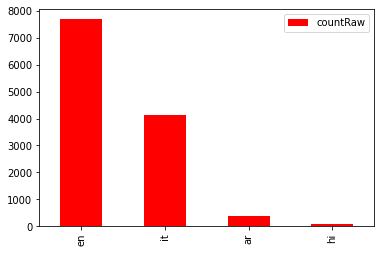

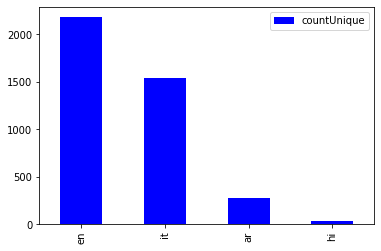

In [88]:
df_wordcounts_raw.plot(kind='bar',use_index=True ,y='countRaw',color='red')
df_wordcounts_raw.plot(kind='bar',use_index=True ,y='countUnique',color='blue')
plt.show()

## Word Counts for Stopword Removed Texts

In [81]:
df_wordcounts_nostop = pd.DataFrame(index = languages)
df_wordcounts_nostop['countRaw'] = df_wordcounts_nostop.index.map(get_wordcount_by_lang(text_bylang_stop))
df_wordcounts_nostop['countUnique'] = df_wordcounts_nostop.index.map(get_wordcount_by_lang(text_bylang_stop, True))
df_wordcounts_nostop

,countRaw,countUnique
en,4709.0,2077.0
it,2642.0,1444.0
ar,307.0,249.0
hi,NaN,NaN


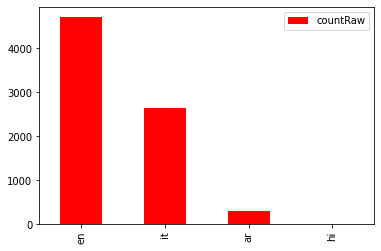

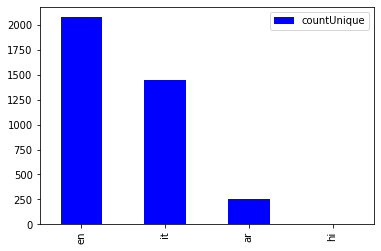

In [89]:
df_wordcounts_nostop.plot(kind='bar',use_index=True ,y='countRaw',color='red')
df_wordcounts_nostop.plot(kind='bar',use_index=True ,y='countUnique',color='blue')
plt.show()

## Word Counts for Stemmed and Stopword Removed Texts

In [82]:
df_wordcounts_stem_stop = pd.DataFrame(index = languages)
df_wordcounts_stem_stop['stemOnly'] = df_wordcounts_nostop.index.map(get_wordcount_by_lang(text_bylang_stemmed, True))
df_wordcounts_stem_stop['stemStop'] = df_wordcounts_nostop.index.map(get_wordcount_by_lang(text_bylang_stop_stemmed, True))
df_wordcounts_stem_stop

,stemOnly,stemStop
en,1625.0,1564.0
it,1163.0,1113.0
ar,NaN,NaN
hi,NaN,NaN
